In [1]:
import warnings

import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

from scipy import stats
from scipy import special

az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = 'retina'
warnings.simplefilter(action="ignore", category=FutureWarning)

az.rcParams["stats.hdi_prob"] = 0.89

In [4]:
reedfrogs = pd.read_csv('Data/reedfrogs.csv')
print(reedfrogs.shape)
reedfrogs.head()

(48, 5)


,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9


In [19]:
tank = np.arange(reedfrogs.shape[0])

with pm.Model() as m13_1:
    a = pm.Normal("a", 0, 1.5, shape=tank.size)
    p = pm.math.invlogit(a)
    S = pm.Binomial("S", reedfrogs.density, p, observed=reedfrogs.surv)
    trace13_1 = pm.sample() 
az.summary(trace13_1)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],1.705,0.757,0.503,2.871,0.009,0.008,8580.0,2648.0,1.00
a[1],2.398,0.879,0.914,3.699,0.009,0.008,9240.0,2790.0,1.00
a[2],0.755,0.630,-0.280,1.721,0.007,0.007,9118.0,2928.0,1.00
a[3],2.402,0.884,1.005,3.783,0.010,0.009,9400.0,2890.0,1.00
a[4],1.707,0.764,0.425,2.838,0.008,0.008,8942.0,2925.0,1.00
a[5],1.714,0.770,0.496,2.922,0.008,0.008,9159.0,2989.0,1.01
a[6],2.408,0.913,0.902,3.802,0.011,0.009,7984.0,2980.0,1.00
a[7],1.711,0.739,0.533,2.857,0.008,0.007,9278.0,3029.0,1.00
a[8],-0.371,0.603,-1.349,0.558,0.006,0.009,10313.0,2803.0,1.00
a[9],1.715,0.758,0.460,2.872,0.008,0.008,9032.0,3007.0,1.00


In [15]:
with pm.Model() as m13_2:
    a_bar = pm.Normal("a_bar", 0, 1.5)
    sigma = pm.Exponential("sigma", 1)
    a = pm.Normal("a", a_bar, sigma, shape=tank.size)
    p = pm.math.invlogit(a[tank])
    S = pm.Binomial("S", reedfrogs.density, p, observed=reedfrogs.surv)
    trace13_2 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [20]:
az.compare({"m13_1": trace13_1, "m13_2": trace13_2}, ic="waic", scale="deviance")

/home/telescreen/Softwares/miniconda3/envs/kaggle/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/home/telescreen/Softwares/miniconda3/envs/kaggle/lib/python3.9/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/telescreen/Softwares/miniconda3/envs/kaggle/lib/python3.9/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m13_2,0,200.384477,21.067363,0.000000,1.0,7.269145,0.000000,True,deviance
m13_1,1,214.294850,25.442835,13.910373,0.0,4.603369,3.781125,True,deviance


In [22]:
az.summary(trace13_2, var_names=['a_bar', 'sigma'])

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,1.346,0.259,0.947,1.773,0.004,0.003,5378.0,3359.0,1.0
sigma,1.621,0.215,1.268,1.934,0.004,0.003,3140.0,2926.0,1.0


Text(40, 0, 'large tanks')

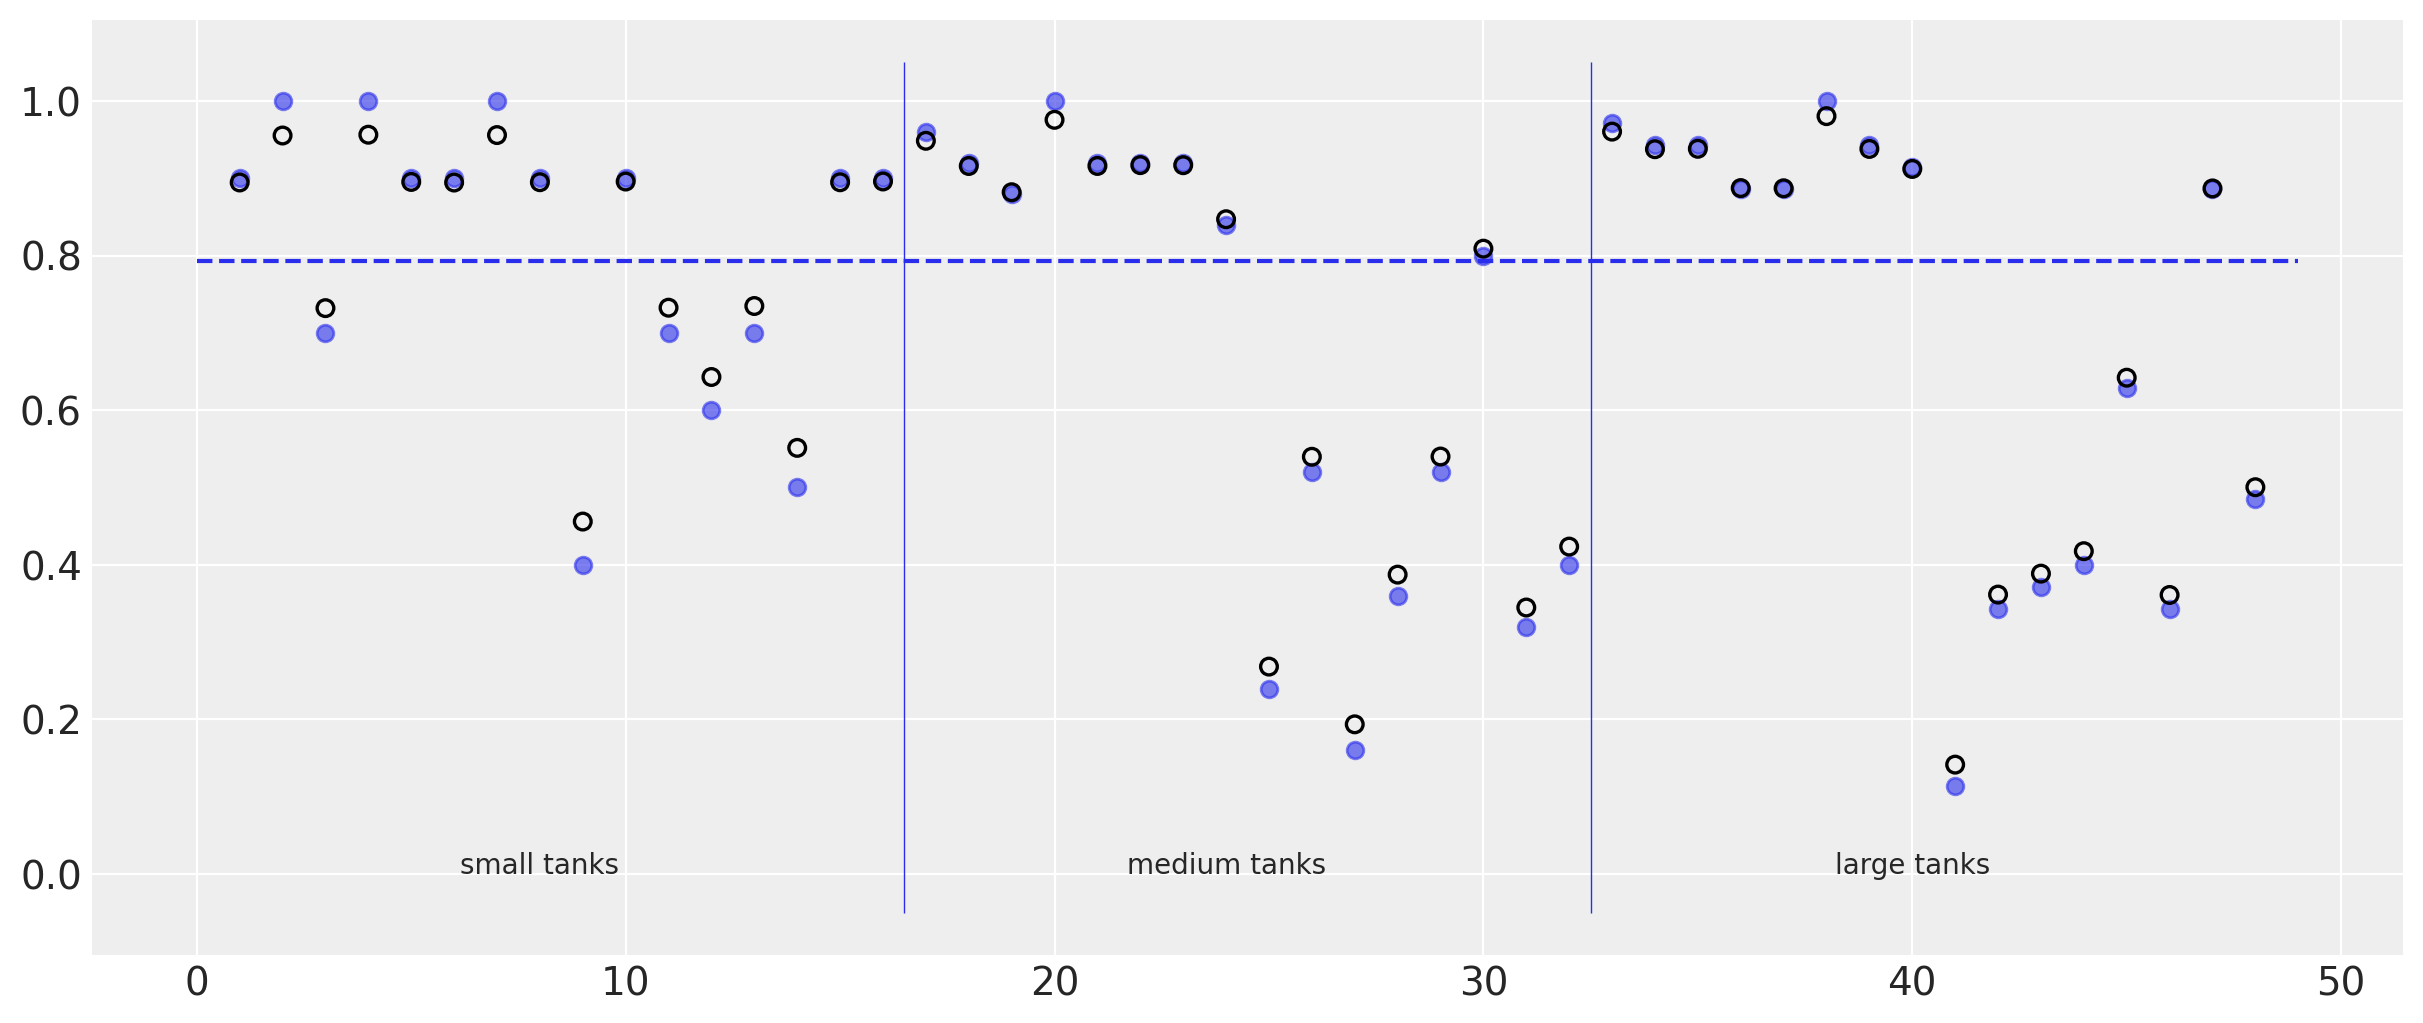

In [41]:
propsurv_est = special.expit(trace13_2['a'].mean(0))
_, ax = plt.subplots(1,1,figsize=(12,5))
ax.scatter(np.arange(1,49), reedfrogs.propsurv, alpha=0.6)
ax.scatter(np.arange(1,49), propsurv_est, facecolors='none', edgecolors='k', lw=1.2)
ax.hlines(special.expit(trace13_2['a_bar'].mean()), 0, 49, linestyles='--')
ax.vlines([16.5, 32.5], -0.05, 1.05, lw=0.5)
ax.text(8, 0, "small tanks", horizontalalignment="center")
ax.text(16 + 8, 0, "medium tanks", horizontalalignment="center")
ax.text(32 + 8, 0, "large tanks", horizontalalignment="center")

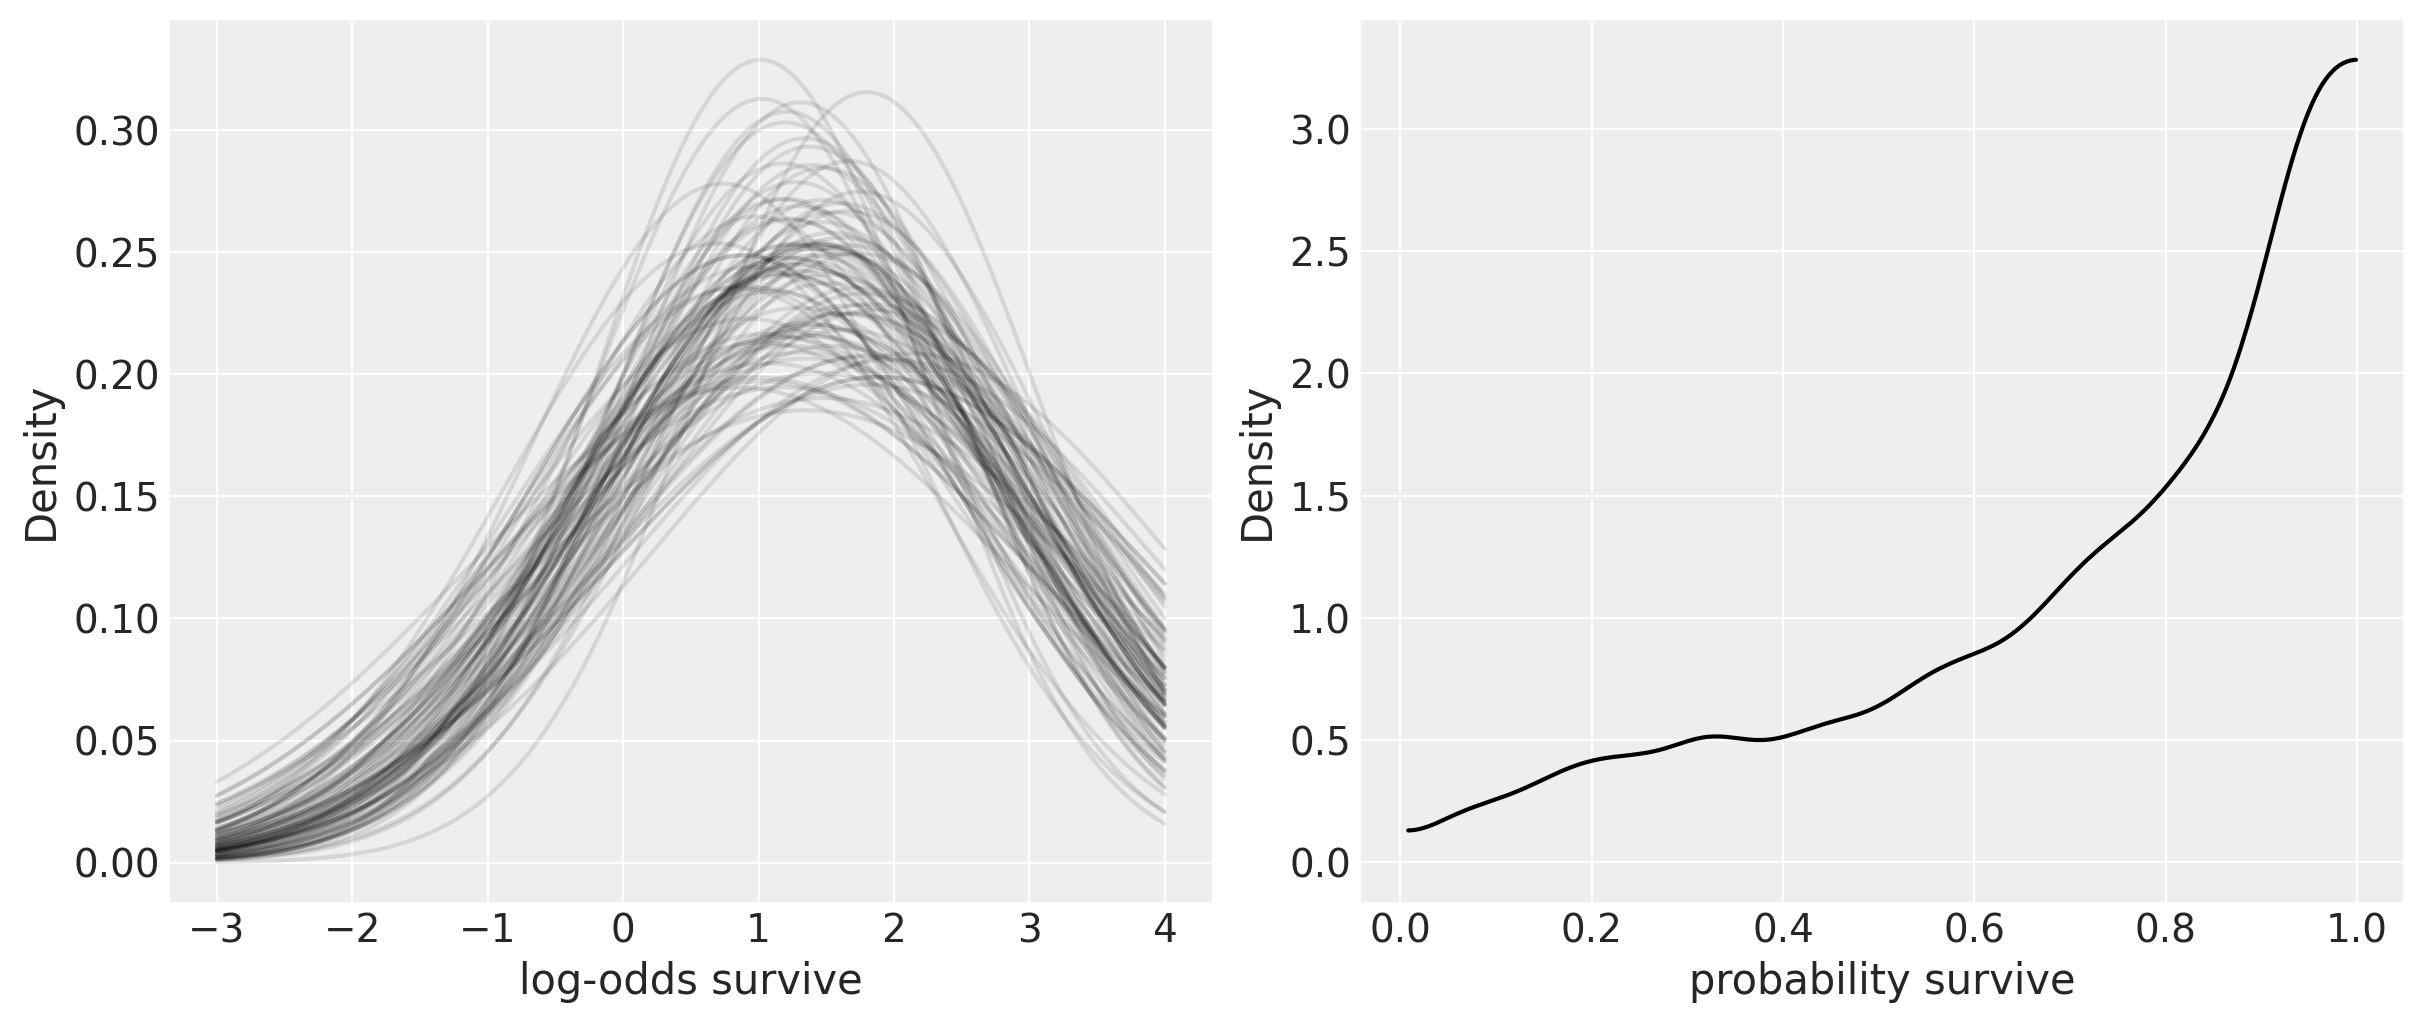

In [49]:
_, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
xrange = np.linspace(-3, 4, 200)
postcurve = [
    stats.norm.pdf(xrange, trace13_2['a_bar'][i], trace13_2['sigma'][i])
    for i in range(100)
]
ax[0].plot(xrange, np.asarray(postcurve).T, alpha=0.1, color='k')
ax[0].set_xlabel('log-odds survive')
ax[0].set_ylabel('Density')

sim_tanks = np.random.normal(loc=trace13_2['a_bar'], scale=trace13_2['sigma'])
az.plot_kde(special.expit(sim_tanks), ax=ax[1], plot_kwargs={'color': 'k'})
ax[1].set_xlabel('probability survive')
ax[1].set_ylabel('Density');

In [85]:
a_bar = 1.5
sigma = 1.5
nponds = 60
Ni = np.repeat([5,10,25,35], 15)

In [86]:
a_pond = np.random.normal(a_bar, sigma, size=nponds)
dsim = pd.DataFrame(dict(true_a=a_pond, Ni=Ni))

In [87]:
dsim['Si'] = np.random.binomial(dsim['Ni'], special.expit(dsim['true_a']))
dsim['p_nopool'] = dsim['Si'] / dsim['Ni']
dsim.head()

,true_a,Ni,Si,p_nopool
0,5.035498,5,5,1.0
1,1.156814,5,3,0.6
2,2.775996,5,4,0.8
3,-0.014550,5,1,0.2
4,-0.604137,5,2,0.4


In [94]:
with pm.Model() as m13_3:
    a_bar = pm.Normal("a_bar", 0, 1.5)
    sigma = pm.Exponential("sigma", 1.0)
    a = pm.Normal("a", a_bar, sigma, shape=nponds)
    p = pm.math.invlogit(a)
    S = pm.Binomial("Si", n=dsim.Ni, p=p, observed=dsim.Si)
    trace13_3 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [95]:
az.summary(trace13_3, var_names=['a_bar', 'sigma'], round_to=2)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,1.62,0.19,1.34,1.92,0.0,0.0,3329.42,2940.31,1.0
sigma,1.17,0.18,0.90,1.45,0.0,0.0,1573.54,2199.07,1.0


In [101]:
dsim['p_partpool'] = special.expit(trace13_3['a'].mean(0))
dsim['p_true'] = special.expit(dsim.true_a)

In [102]:
nopool_error = np.abs(dsim.p_nopool - dsim.p_true)
partpool_error = np.abs(dsim.p_partpool - dsim.p_true)

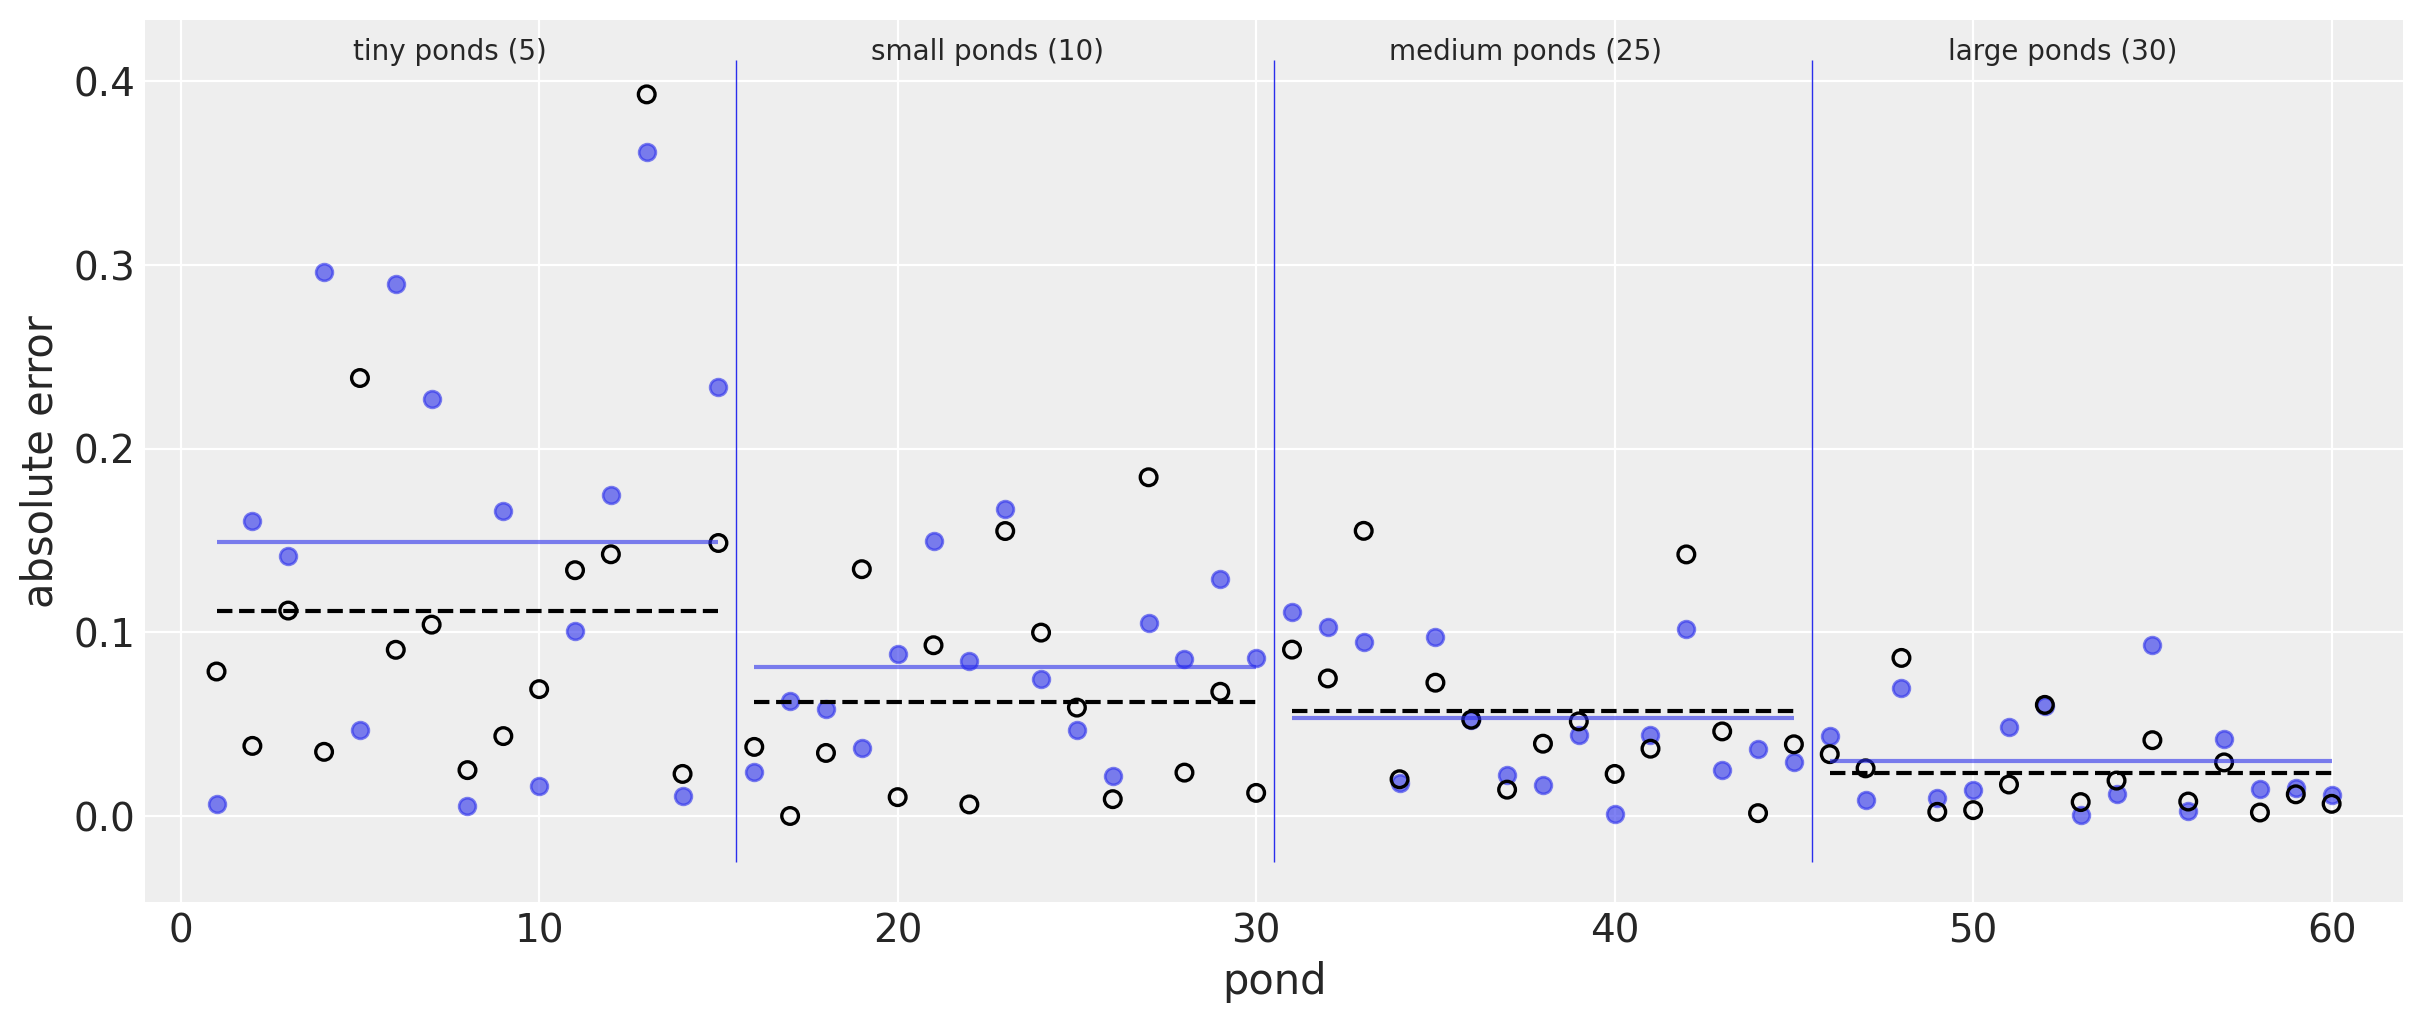

In [106]:
_, ax = plt.subplots(1, 1, figsize=(12, 5))
xrange = np.arange(60)
xrange_ = xrange.reshape((4, 15))

ax.scatter(xrange + 1, nopool_error, alpha=0.6)
ax.scatter(xrange + 1, partpool_error, facecolors="none", edgecolors="k", lw=1.2)
ax.vlines(xrange_[1:, 0] + 0.5, -0.025, max(nopool_error) + 0.05, lw=0.5)

textall = [
    "tiny ponds (5)",
    "small ponds (10)",
    "medium ponds (25)",
    "large ponds (30)",
]
for isem in range(4):
    ax.hlines(
        nopool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="C0",
        alpha=0.6,
    )
    ax.hlines(
        partpool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="k",
        linestyles="--",
    )
    ax.text(
        xrange_[isem, 7] + 0.5,
        max(nopool_error) + 0.05,
        textall[isem],
        horizontalalignment="center",
    )

ax.set_xlabel("pond")
ax.set_ylabel("absolute error")
ax.set_xlim(-1, 62);

In [114]:
chimpanzee = pd.read_csv('Data/chimpanzees.csv', sep=';')
chimpanzee

,actor,recipient,condition,block,trial,prosoc_left,chose_prosoc,pulled_left
0,1,NaN,0,1,2,0,1,0
1,1,NaN,0,1,4,0,0,1
2,1,NaN,0,1,6,1,0,0
3,1,NaN,0,1,8,0,1,0
4,1,NaN,0,1,10,1,1,1
...,...,...,...,...,...,...,...,...
499,7,4.0,1,6,64,1,1,1
500,7,6.0,1,6,66,1,1,1
501,7,3.0,1,6,68,0,0,1
502,7,7.0,1,6,70,0,0,1
